In [1]:
#import library
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data
df = pd.read_csv("../data/AAPL_historical_data.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [3]:
df.shape

(10998, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10998 non-null  object 
 1   Open          10998 non-null  float64
 2   High          10998 non-null  float64
 3   Low           10998 non-null  float64
 4   Close         10998 non-null  float64
 5   Adj Close     10998 non-null  float64
 6   Volume        10998 non-null  int64  
 7   Dividends     10998 non-null  float64
 8   Stock Splits  10998 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 773.4+ KB


In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

In [6]:
df.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000,1.099800e+04,10998.000000,10998.000000
mean,22.299160,22.539055,22.068367,22.312754,21.494496,3.180806e+08,0.000752,0.001546
std,46.003685,46.496031,45.540929,46.037660,45.561916,3.354523e+08,0.011753,0.083663
min,0.049665,0.049665,0.049107,0.049107,0.037857,0.000000e+00,0.000000,0.000000
25%,0.299107,0.303710,0.290179,0.298549,0.241840,1.132545e+08,0.000000,0.000000
50%,0.531250,0.537946,0.522321,0.531250,0.432079,2.057412e+08,0.000000,0.000000
75%,20.204196,20.389554,19.998036,20.196160,17.253029,3.985275e+08,0.000000,0.000000
max,236.479996,237.229996,233.089996,234.820007,234.548523,7.421641e+09,0.250000,7.000000


In [8]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Display the first few rows
print(df.head())

                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

            Dividends  Stock Splits  
Date                                 
1980-12-12        0.0           0.0  
1980-12-15        0.0           0.0  
1980-12-16        0.0           0.0  
1980-12-17        0.0           0.0  
1980-12-18        0.0           0.0  


2. Apply Technical Analysis Indicators with TA-Lib
2.1 Import TA-Lib

In [9]:
import talib
# Calculate 20-day Simple Moving Average (SMA)
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)

# Calculate 50-day Simple Moving Average (SMA)
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)



In [10]:
df['SMA_20'].head(30)

Date
1980-12-12         NaN
1980-12-15         NaN
1980-12-16         NaN
1980-12-17         NaN
1980-12-18         NaN
1980-12-19         NaN
1980-12-22         NaN
1980-12-23         NaN
1980-12-24         NaN
1980-12-26         NaN
1980-12-29         NaN
1980-12-30         NaN
1980-12-31         NaN
1981-01-02         NaN
1981-01-05         NaN
1981-01-06         NaN
1981-01-07         NaN
1981-01-08         NaN
1981-01-09         NaN
1981-01-12    0.138588
1981-01-13    0.138979
1981-01-14    0.139732
1981-01-15    0.141071
1981-01-16    0.142215
1981-01-19    0.143611
1981-01-20    0.144420
1981-01-21    0.145061
1981-01-22    0.145508
1981-01-23    0.145564
1981-01-26    0.144838
Name: SMA_20, dtype: float64

In [12]:
#Relative Strength Index (RSI)
# Calculate 14-day RSI
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
df['RSI']


Date
1980-12-12          NaN
1980-12-15          NaN
1980-12-16          NaN
1980-12-17          NaN
1980-12-18          NaN
                ...    
2024-07-24    48.687742
2024-07-25    47.386437
2024-07-26    48.055700
2024-07-29    48.476184
2024-07-30    49.359115
Name: RSI, Length: 10998, dtype: float64

In [13]:
#Moving Average Convergence Divergence (MACD)
# Calculate MACD
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'], df['MACD_signal'], df['MACD_hist']



(Date
 1980-12-12         NaN
 1980-12-15         NaN
 1980-12-16         NaN
 1980-12-17         NaN
 1980-12-18         NaN
                 ...   
 2024-07-24    4.662717
 2024-07-25    3.748082
 2024-07-26    3.026267
 2024-07-29    2.448591
 2024-07-30    2.012764
 Name: MACD, Length: 10998, dtype: float64,
 Date
 1980-12-12         NaN
 1980-12-15         NaN
 1980-12-16         NaN
 1980-12-17         NaN
 1980-12-18         NaN
                 ...   
 2024-07-24    6.678882
 2024-07-25    6.092722
 2024-07-26    5.479431
 2024-07-29    4.873263
 2024-07-30    4.301163
 Name: MACD_signal, Length: 10998, dtype: float64,
 Date
 1980-12-12         NaN
 1980-12-15         NaN
 1980-12-16         NaN
 1980-12-17         NaN
 1980-12-18         NaN
                 ...   
 2024-07-24   -2.016164
 2024-07-25   -2.344640
 2024-07-26   -2.453164
 2024-07-29   -2.424672
 2024-07-30   -2.288399
 Name: MACD_hist, Length: 10998, dtype: float64)

In [14]:
print(df[['Close', 'SMA_20', 'SMA_50', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist']].head(60))

               Close    SMA_20    SMA_50        RSI      MACD  MACD_signal  \
Date                                                                         
1980-12-12  0.128348       NaN       NaN        NaN       NaN          NaN   
1980-12-15  0.121652       NaN       NaN        NaN       NaN          NaN   
1980-12-16  0.112723       NaN       NaN        NaN       NaN          NaN   
1980-12-17  0.115513       NaN       NaN        NaN       NaN          NaN   
1980-12-18  0.118862       NaN       NaN        NaN       NaN          NaN   
1980-12-19  0.126116       NaN       NaN        NaN       NaN          NaN   
1980-12-22  0.132254       NaN       NaN        NaN       NaN          NaN   
1980-12-23  0.137835       NaN       NaN        NaN       NaN          NaN   
1980-12-24  0.145089       NaN       NaN        NaN       NaN          NaN   
1980-12-26  0.158482       NaN       NaN        NaN       NaN          NaN   
1980-12-29  0.160714       NaN       NaN        NaN       NaN   

In [14]:
import pynance
dir(pynance)



['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'absolute_import',
 'chart',
 'common',
 'data',
 'dateutils',
 'decorate',
 'division',
 'expand',
 'featurize',
 'has_na',
 'interest',
 'learn',
 'pd',
 'pf',
 'print_function',
 'tech']

In [16]:
import pynance.tech as tech

# Explore available functions or classes in tech module
print(dir(tech))


['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'absolute_import', 'bollinger', 'ema', 'ema_growth', 'growth', 'growth_volatility', 'ln_growth', 'movave', 'np', 'pd', 'ratio_to_ave', 'ret', 'simple', 'sma', 'volatility']


In [17]:
import pynance.data as data

# Explore available functions or classes in data module
print(dir(data))


['FTP', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'absolute_import', 'center', 'combine', 'compare', 'equities', 'feat', 'get', 'io', 'lab', 'labeledfeatures', 'normalize', 'np', 'os', 'partial', 'pd', 'pn', 'prep', 'retrieve', 'transform', 'web']


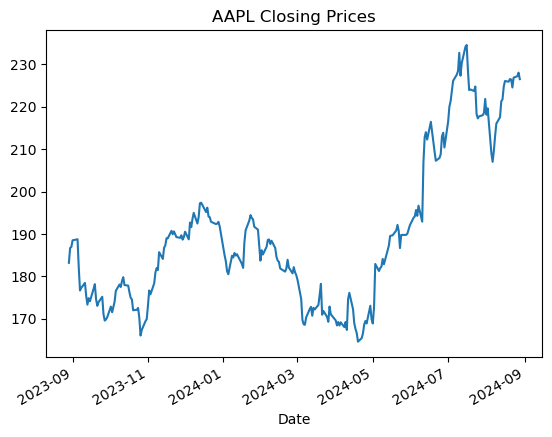

In [19]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch historical stock data
stock_data = yf.Ticker('AAPL')  # Apple Inc. ticker symbol
historical_data = stock_data.history(period='1y')  # Get 1-year historical data

# Example: Plot the closing price
historical_data['Close'].plot(title='AAPL Closing Prices')
plt.show()


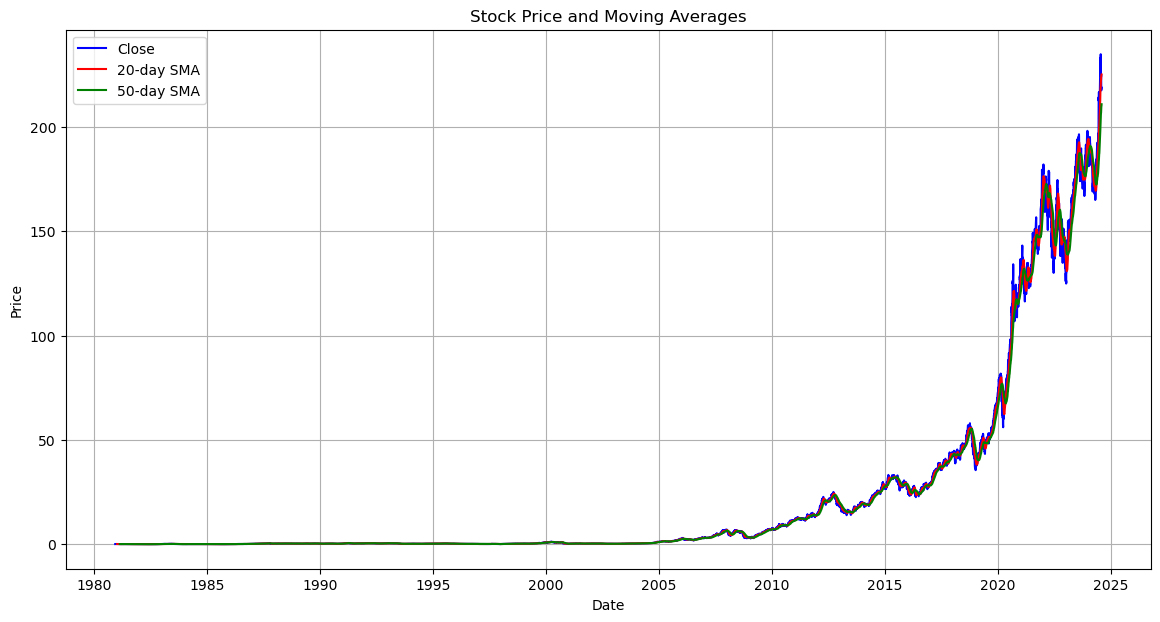

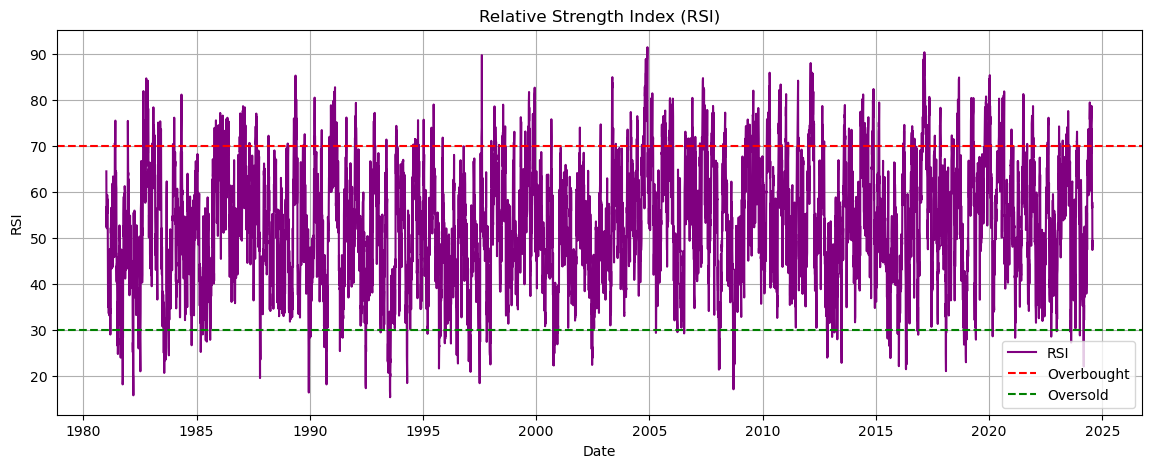

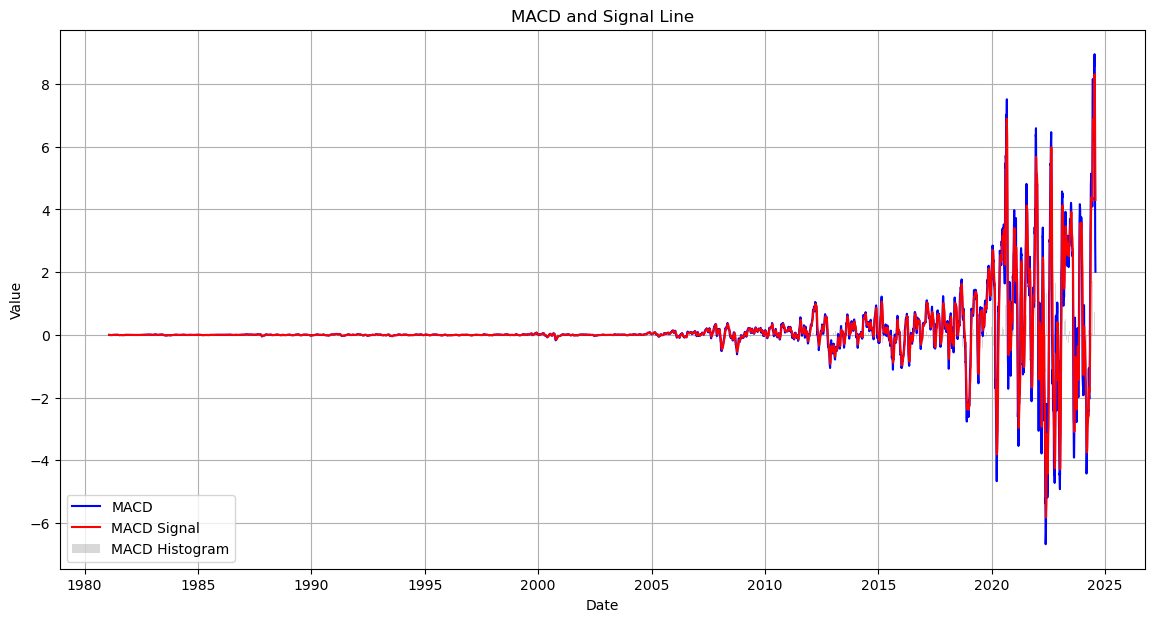

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot the closing price and moving averages
plt.plot(df.index, df['Close'], label='Close', color='blue')
plt.plot(df.index, df['SMA_20'], label='20-day SMA', color='red')
plt.plot(df.index, df['SMA_50'], label='50-day SMA', color='green')

plt.title('Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot RSI
plt.figure(figsize=(14, 5))
plt.plot(df.index, df['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

# Plot MACD
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['MACD'], label='MACD', color='blue')
plt.plot(df.index, df['MACD_signal'], label='MACD Signal', color='red')
plt.bar(df.index, df['MACD_hist'], label='MACD Histogram', color='gray', alpha=0.3)
plt.title('MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Load stock price data into a DataFrame
def load_data(file_path):
    df = pd.read_csv(file_path, parse_dates=['Date'])
    df.set_index('Date', inplace=True)
    return df

# Example usage
file_path = '../data/stock_data.csv'  # Update the file path as necessary
stock_df = load_data(file_path)
print(stock_df.head())
